# Drug Sentiment Analysis

## Problem Statement
The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction. We have to create a target feature out of ratings and predict the sentiment of the reviews.

### Data Description :
The data is split into a train (75%) a test (25%) partition.

* drugName (categorical): name of drug
* condition (categorical): name of condition
* review (text): patient review
* rating (numerical): 10 star patient rating
* date (date): date of review entry
* usefulCount (numerical): number of users who found review useful

The structure of the data is that a patient with a unique ID purchases a drug that meets his condition and writes a review and rating for the drug he/she purchased on the date. Afterwards, if the others read that review and find it helpful, they will click usefulCount, which will add 1 for the variable.

### Import all the necessary packages
Here we have imported the basic packages that are required to do basic processing.

In [209]:
#import all the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

### Load Data

In [210]:
import pandas as pd

# Read the train and test data
train = pd.read_csv(r'C:\Users\HP\Downloads\movies\sentiment analysis on healthcare\drugsComTrain_raw.csv\drugsComTrain_raw.csv') # train data
test = pd.read_csv(r'C:\Users\HP\Downloads\movies\sentiment analysis on healthcare\drugsComTest_raw.csv\drugsComTest_raw.csv') # test data


### Checking Out The Data

In [211]:
#check the head of train data
train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [212]:
#check the head of test data
test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


By looking at the head of train and test data we see that there are 7 features in our Dataset but we don't have any sentiment feature which can serve as our target variable. We will make a target feature out of rating.

In [213]:
#check the shape of the given dataset
print(f'train has {train.shape[0]} number of rows and {train.shape[1]} number of columns')
print(f'test has {test.shape[0]} number of rows and {test.shape[1]} number of columns')

train has 161297 number of rows and 7 number of columns
test has 53766 number of rows and 7 number of columns


In [214]:
#check the columns in train
train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

## Exploratory Data Analysis

The purpose of EDA is to find out interesting insights and irregularities in our Dataset. We will look at Each feature and try to find out interesting facts and patterns from them. And see whether there is any relationship between the variables or not.

Merge the train and test data as there are no target labels. We will perform our EDA and Pre-processing on merged data. Then we will dive the data into 70 : 30 ratio for training and testing

In [215]:
#merge train and test data

merge = [train,test]
merged_data = pd.concat(merge,ignore_index=True)

merged_data.shape   #check the shape of merged_data

(215063, 7)

### Check number of uniqueIds to see if there's any duplicate record in our dataset

In [216]:
#check uniqueID
merged_data['uniqueID'].nunique()

215063

There are 215063 uniqueIds meaning that every record is unique.

### Check information of the merged data

In [217]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


### Check the Description

In [218]:
merged_data.describe(include='all')

,uniqueID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,1-Mar-16,NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


**Following things can be noticed from the description**
* Top **drugName** is **Levonorgestrel**
* Top **condition** is **Birth Control**.
* Top **review** is just a single word "Good".
* Most single day review came on 1-Mar-16, it will be interesting to investigate this date and see for which drugName and which conditions these reviews were for.

### Check the percentage of null values in each column

In [219]:
merged_data.isnull().sum()/merged_data.shape[0]

uniqueID       0.000000
drugName       0.000000
condition      0.005552
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64

We have null values in just 1 column i.e **condition** . We will leave the null values in that column for now as the null values are very small.

### Check number of unique values in drugName and condition

In [220]:
#check number of unique values in drugName
print(merged_data['drugName'].nunique())

#check number of unique values in condition
print(merged_data['condition'].nunique())

3671
916


We can see that there are 3671 drugName and only 916 conditions. So there are conditions which has multiple drugs.

### Check the top 20 conditions

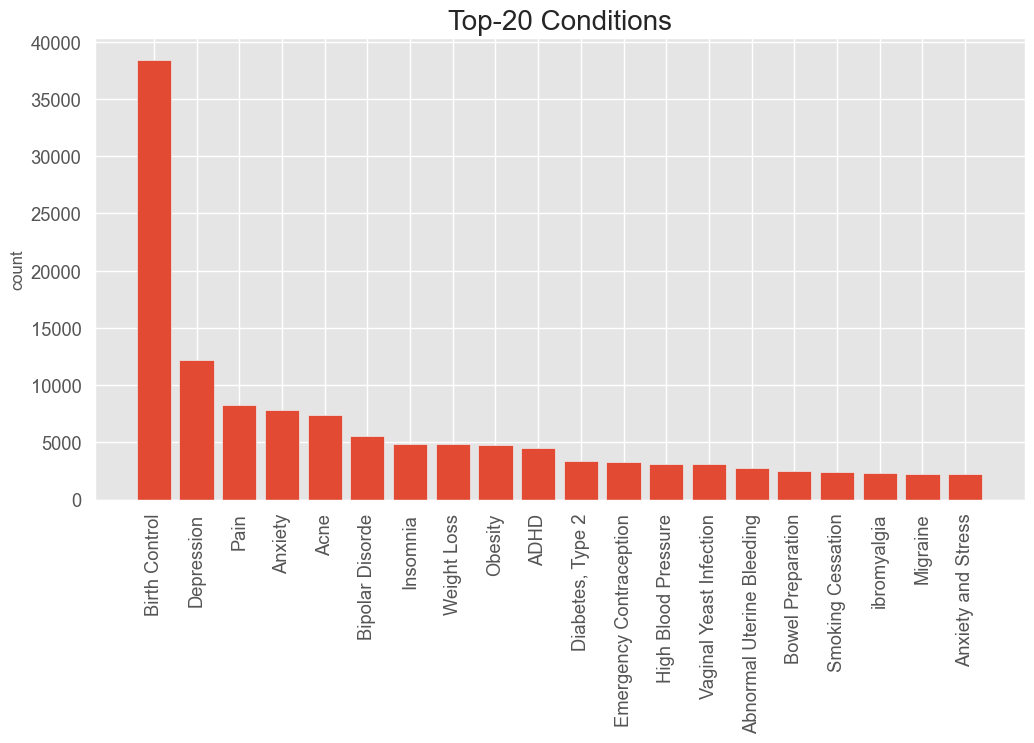

In [221]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(12,6))
conditions = merged_data['condition'].value_counts(ascending = False).head(20)

plt.bar(conditions.index,conditions.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

**From above graph we can see that the :**
* Birth control is twice as big as anyone, around 38,000.
* Most of the conditions for top 20 conditions are between 5000 - 10000 

### Plot the bottom 20 conditions

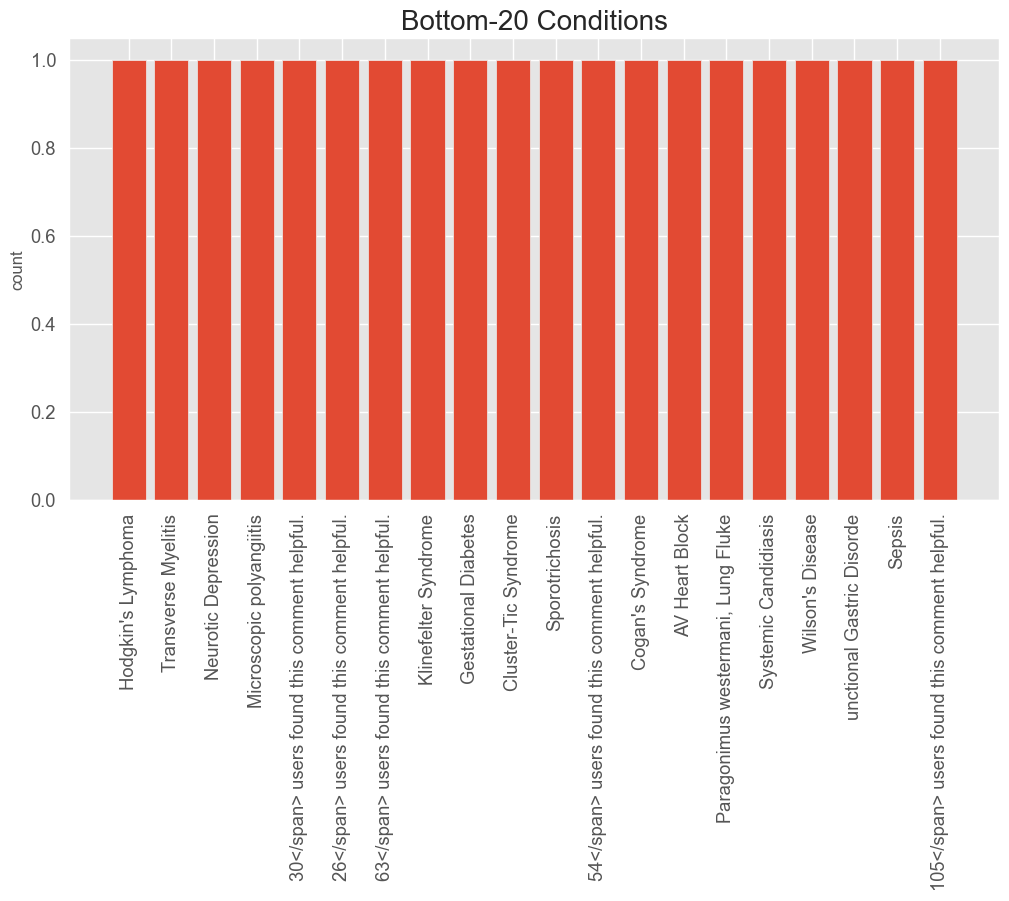

In [222]:
#plot a bargraph to check bottom 20 conditions
plt.figure(figsize=(12,6))
conditions_bottom = merged_data['condition'].value_counts(ascending = False).tail(20)

plt.bar(conditions_bottom.index,conditions_bottom.values)
plt.title('Bottom-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

* Bottom 20 conditions have just single counts in our dataset. They may be the rare conditions.
* And if we look at our plot we see that there are conditions whose name are strange starting with **"61<_/span_>users found this comment helpful"** , these are the noise present in our data.

### Check top 20 drugName

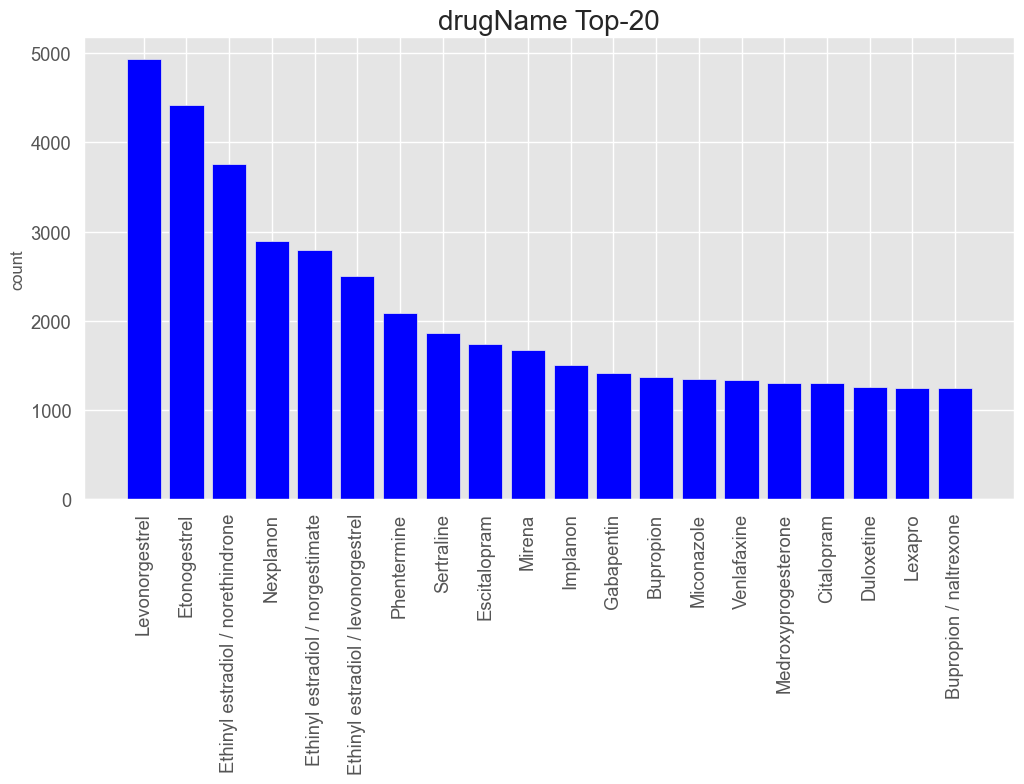

In [223]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_top = merged_data['drugName'].value_counts(ascending = False).head(20)

plt.bar(drugName_top.index,drugName_top.values,color='blue')
plt.title('drugName Top-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

* The top drugName is Levonorgestrel, which we had seen in description as well.
* The top 3 drugName has count around 4000 and above. 
* Most of the drugName counts are around 1500 if we look at top 20

### Check bottom 20 drugName

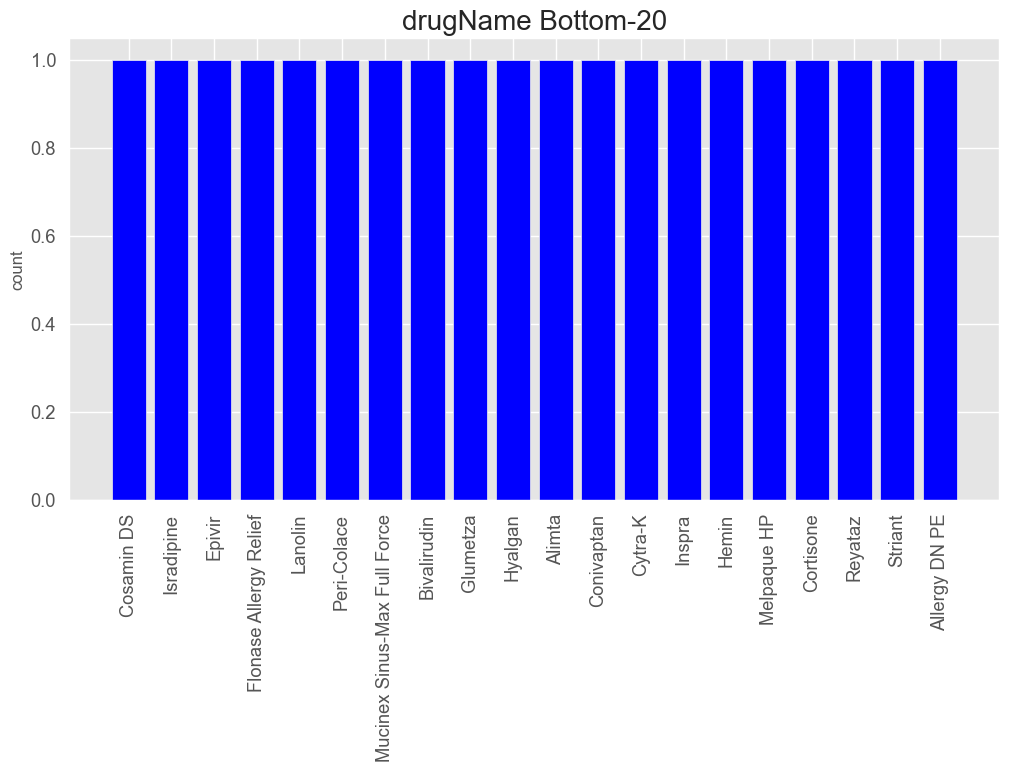

In [224]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_bottom = merged_data['drugName'].value_counts(ascending = False).tail(20)

plt.bar(drugName_bottom.index,drugName_bottom.values,color='blue')
plt.title('drugName Bottom-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

* The bottom 20 drugName has count 1. These might be the drugs used of rare conditions or are new in market.

### Checking Ratings Distribution

In [225]:
ratings_ = merged_data['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/merged_data.shape[0])
print(ratings_)

   counts  count   percent
0      10  68005  0.004650
1       9  36708  0.004185
2       1  28918  0.000465
3       8  25046  0.003720
4       7  12547  0.003255
5       5  10723  0.002325
6       2   9265  0.000930
7       3   8718  0.001395
8       6   8462  0.002790
9       4   6671  0.001860


We notice that most of the ratings are high with ratings 10 and 9.
rating 1 is also high which shows the extreme ratings of the user. We can say that the users mostly prefer to rate when the drugs are either very useful to them or the drugs fails, or there is some side effects. About 70% of the values have rating greater than 7.

### Check the distribution of usefulCount

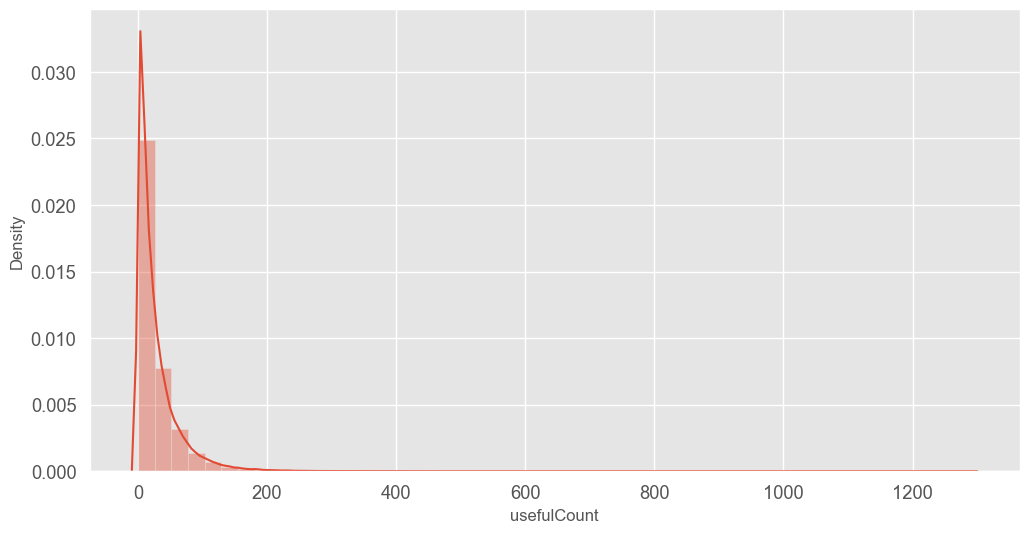

In [226]:
#plot a distplot of usefulCount
sns.distplot(merged_data['usefulCount'])
plt.show()

* usefulCount is positively-skewed.
* Most of the usefulCounts are distributed between 0 and 200.
* There are extreme outliers present in our usefulCounts. We either have to remove them or transform them.

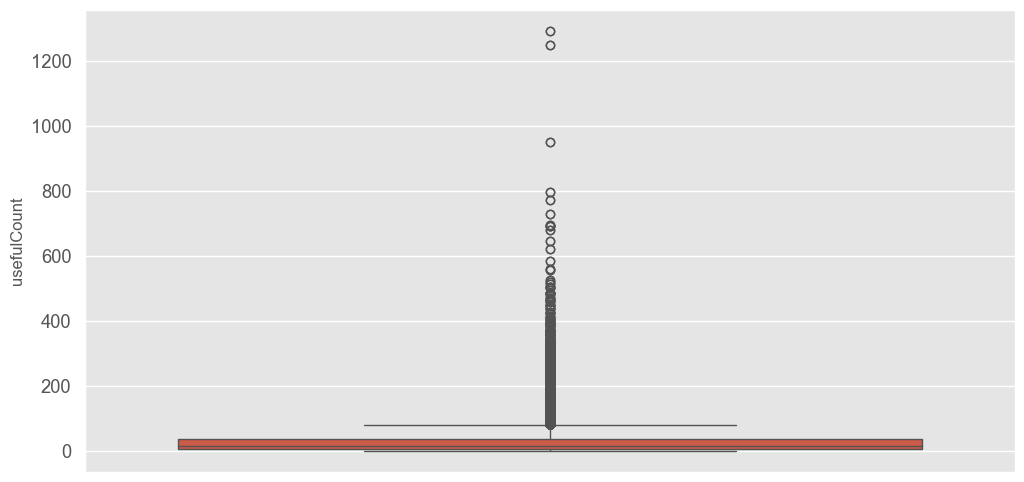

In [227]:
#check the descriptive summary
sns.boxplot(y = merged_data['usefulCount'])
plt.show()

We can see that there are huge outliers present in our dataset. Some drugs have extreme useful counts.

### Check number of Drugs per condition

In [228]:
#lets check the number of drugs/condition
merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                           58
4</span> users found this comment helpfu

If we look above the top value is not listed/othe. 
* It might be possible that the user didn't mentioned his/her condition as sometimes people doesn't want to reveal thier disorders. We can look up the drug names and fill up the conditions for which that drug is used.

* Another point to note here is that there are values is condition like **'3 <_/span_> user found this comment helpful'**, **4<_/span_> users found this comment helpful**. These are the noises present in our dataset. The dataset appears to have been extracted through webscraping, the values are wrongly fed in here.

##### Let's look at ''3 <_/span_> user found this comment helpful'

In [229]:
span_data = merged_data[merged_data['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/merged_data.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))

Number of rows with </span> values :  1171
Total percent of noisy data 0.5444916140851751 %  


 There are only 0.54 % values with  </span  type data. We can remove these from our dataset as we won't lose much information by removing them.

In [230]:
#drop the nosie 
merged_data.drop(span_data.index, axis = 0, inplace=True)

In [231]:
# after removing the noise, let's check the shape
merged_data.shape[0]

213892

### Now Check number of drugs present per condition after removing noise

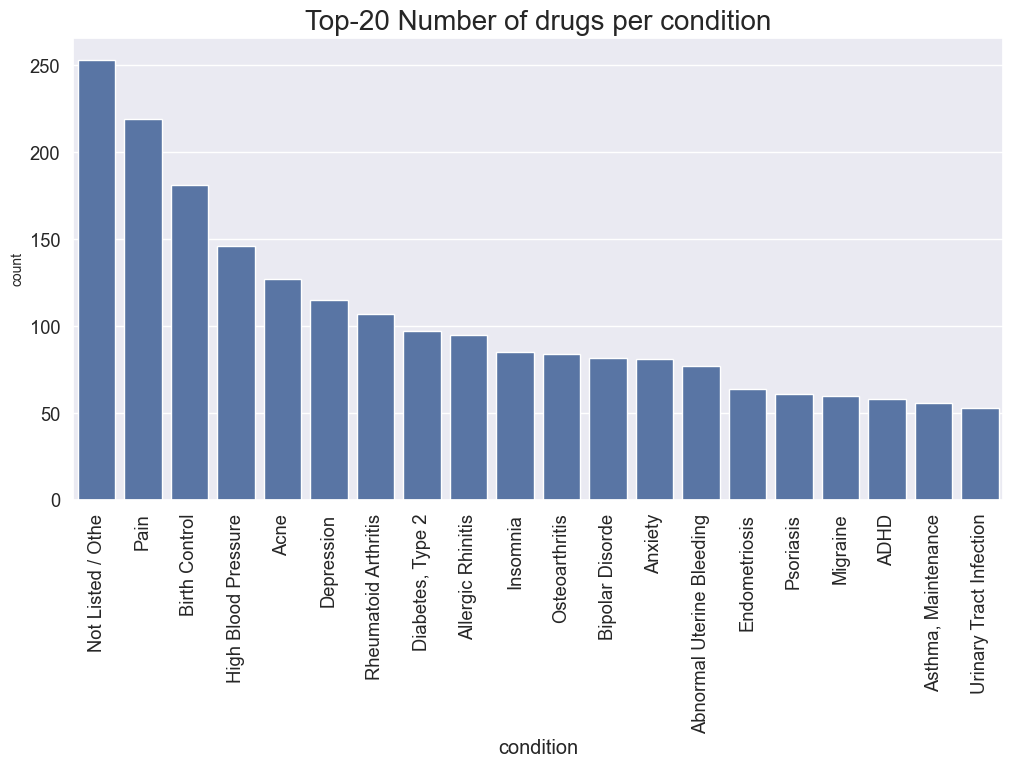

In [232]:
#lets check the number of drugs present in our dataset condition wise
conditions_gp = merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False)

#plot the top 20
# Setting the Parameter
condition_gp_top_20 = conditions_gp.head(20)
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
sns.barplot(x = condition_gp_top_20.index, y = condition_gp_top_20.values)
plt.title('Top-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

* Most of the drugs are for pain, birth control and high blood pressure which are common conditions.
* In top- 20 each condition has above 50 drugs.

### Check bottom 20 drugs per conditions

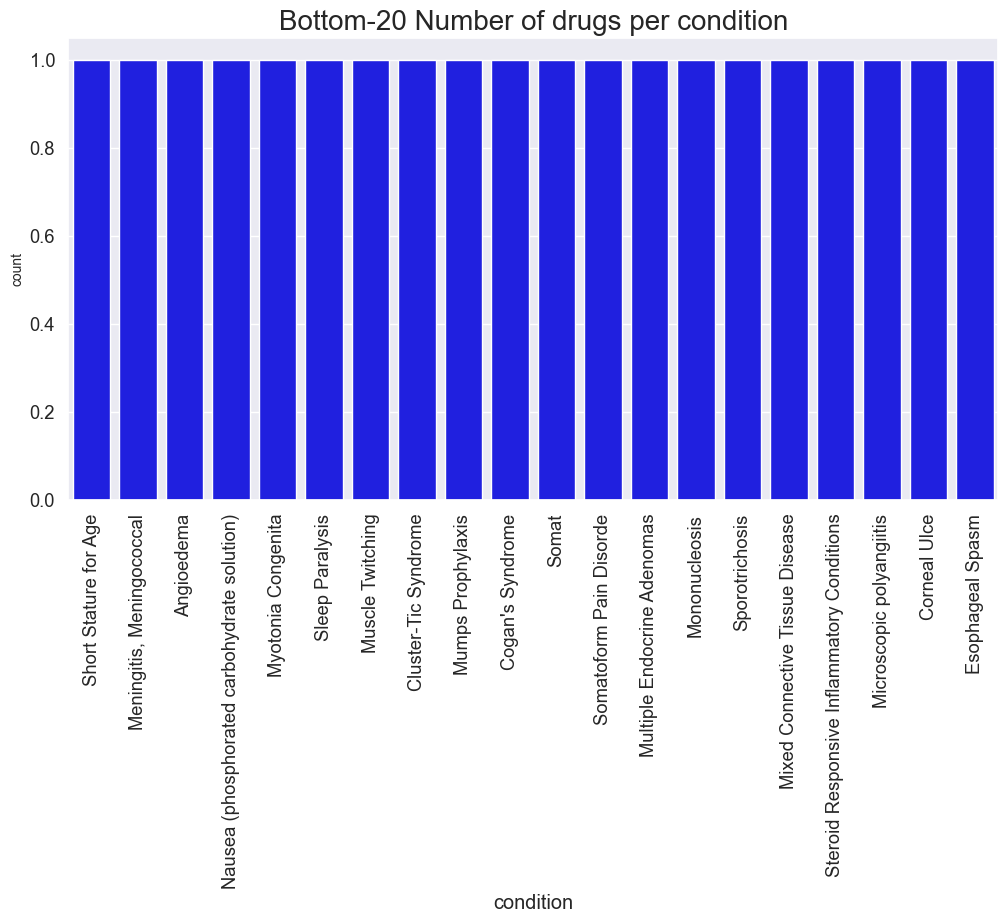

In [233]:
#bottom-20
condition_gp_bottom_20 = conditions_gp.tail(20)
#plot the top 20

sns.barplot(x = condition_gp_bottom_20.index, y = condition_gp_bottom_20.values,color='blue')
plt.title('Bottom-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

Bottom-20 conditions just have single drugs. These are the rare conditions.

### Now let's check if a single drug can be used for Multiple conditions

In [234]:
#let's check if a single drug is used for multiple conditions
drug_multiple_cond = merged_data.groupby('drugName')['condition'].nunique().sort_values(ascending=False)
print(drug_multiple_cond.head(10))

drugName
Prednisone       39
Gabapentin       31
Doxycycline      25
Ciprofloxacin    25
Amitriptyline    24
Venlafaxine      23
Metronidazole    23
Dexamethasone    22
Azithromycin     20
Triamcinolone    20
Name: condition, dtype: int64


There are many drugs which can be used for multiple conditions. 

### Check the number of drugs with rating 10

In [235]:
#Let's check the Number of drugs with rating 10.
merged_data[merged_data['rating'] == 10]['drugName'].nunique()

2914

We have 2907 drugs with rating 10.

### Plot top-20 drugs with rating 10

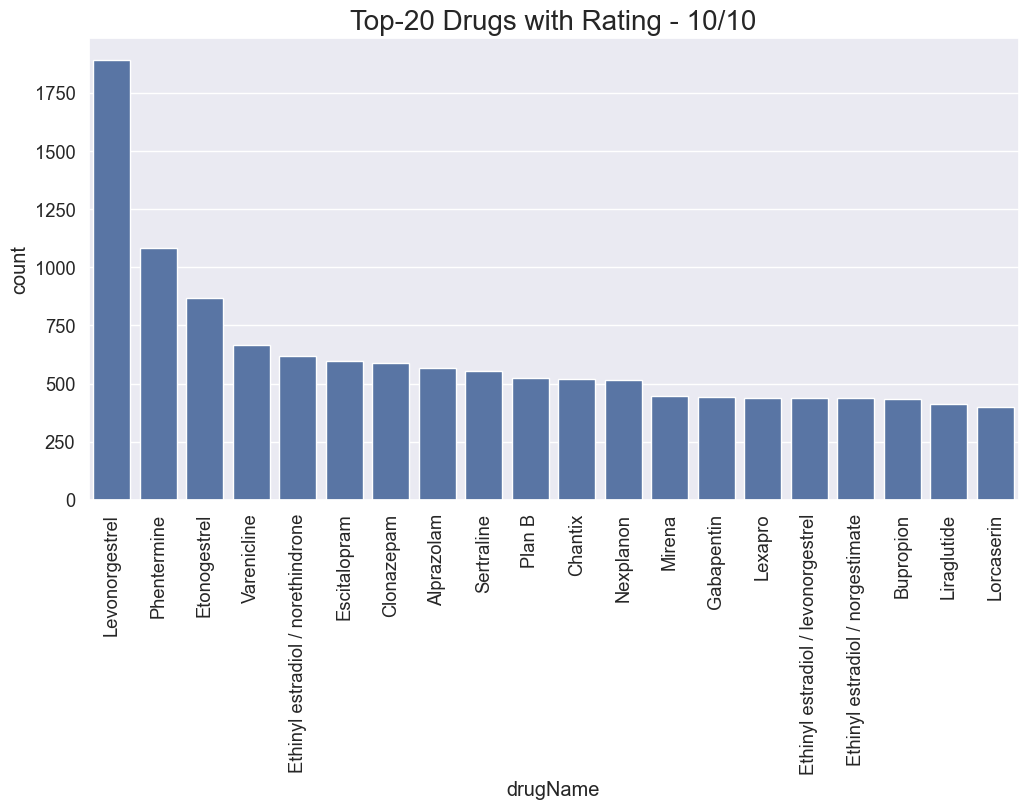

In [236]:
#Check top 20 drugs with rating=10/10
top_20_ratings = merged_data[merged_data['rating'] == 10]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings.index, y = top_20_ratings.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 10/10', fontsize=20)
plt.ylabel('count')
plt.show()

* We can see that Levonorgestrel has most of the ratings 10/10. It seems it is used for the common condition and, it would be the most effective one.
* Other drugs have ratings between 1000 and 500 from top-20 10/10.

### Check for what condition Levonorgestrel is used for

In [237]:
merged_data[merged_data['drugName'] == 'Levonorgestrel']['condition'].unique()

array(['Emergency Contraception', 'Birth Control',
       'Abnormal Uterine Bleeding', nan, 'Not Listed / Othe'],
      dtype=object)

Levonorgestrel is used for 3 different conditions. 
* emergency contraception
* birth control
* abnormal uterine bleeding

### Top 10 drugs with 1/10 Rating

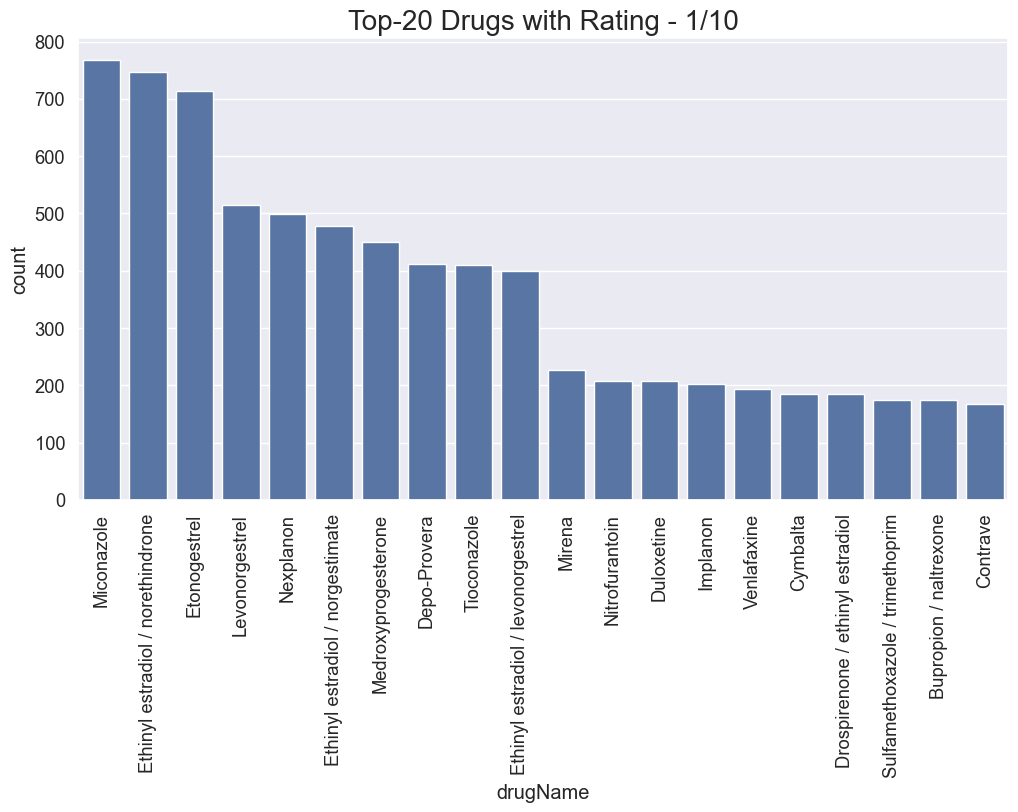

In [238]:
#check top 20 drugs with 1/10 rating

top_20_ratings_1 = merged_data[merged_data['rating'] == 1]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings_1.index, y = top_20_ratings_1.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 1/10', fontsize=20)
plt.ylabel('count')
plt.show()

Top-3 of 1/10 ratings have almost 700 counts. Which means they are not so useful drugs.

### Now we will look at the Date column

In [239]:
# convert date to datetime and create year and month features

merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['year'] = merged_data['date'].dt.year  #create year
merged_data['month'] = merged_data['date'].dt.month #create month

### Check Number of reviews per year

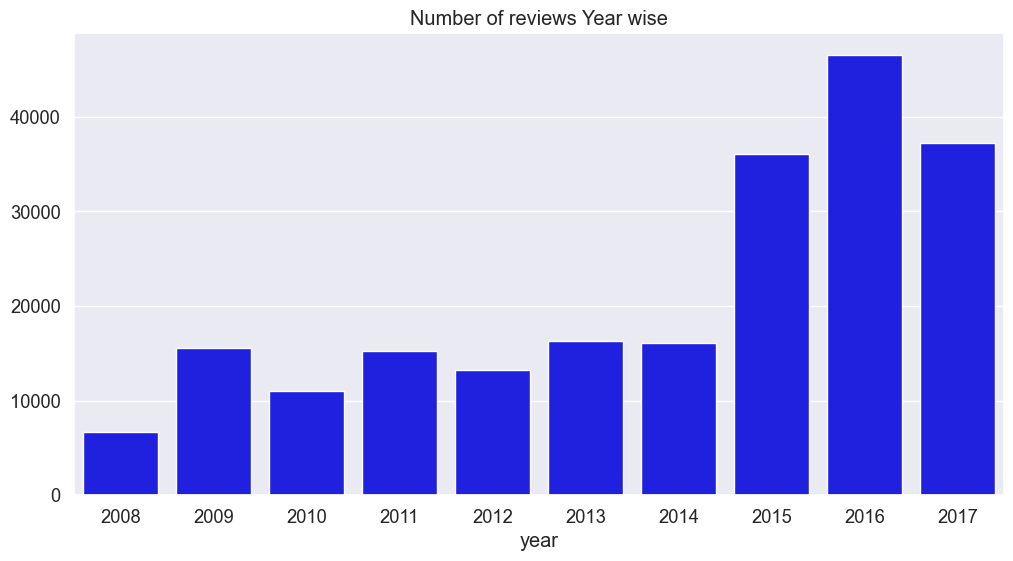

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot number of reviews year wise
count_reviews = merged_data['year'].value_counts().sort_index()
sns.barplot(x=count_reviews.index, y=count_reviews.values, color='blue')
plt.title('Number of reviews Year wise')
plt.show()


The year 2015, 2016 and 2017 accounts for the most reviews. Almost 60% of the reviews are from these years.

### Check average rating per year

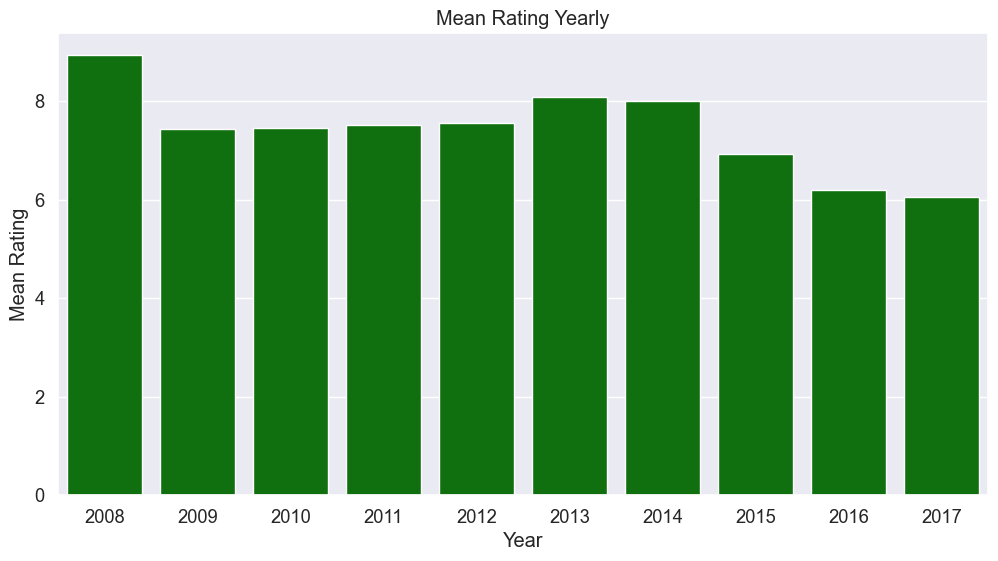

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is a DataFrame containing the necessary data
# Replace this with the actual DataFrame containing your data

# Check average rating per year
yearly_mean_rating = merged_data.groupby('year')['rating'].mean()
sns.barplot(x=yearly_mean_rating.index, y=yearly_mean_rating.values, color='green')
plt.title('Mean Rating Yearly')
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.show()


* Rating has been almost constant from year 2009 - 2014 but after 2014 the ratings has started to decrease.
* As the number of reviews has increased for last 3 years, the rating has decreased.

### Per year drug count and Condition count

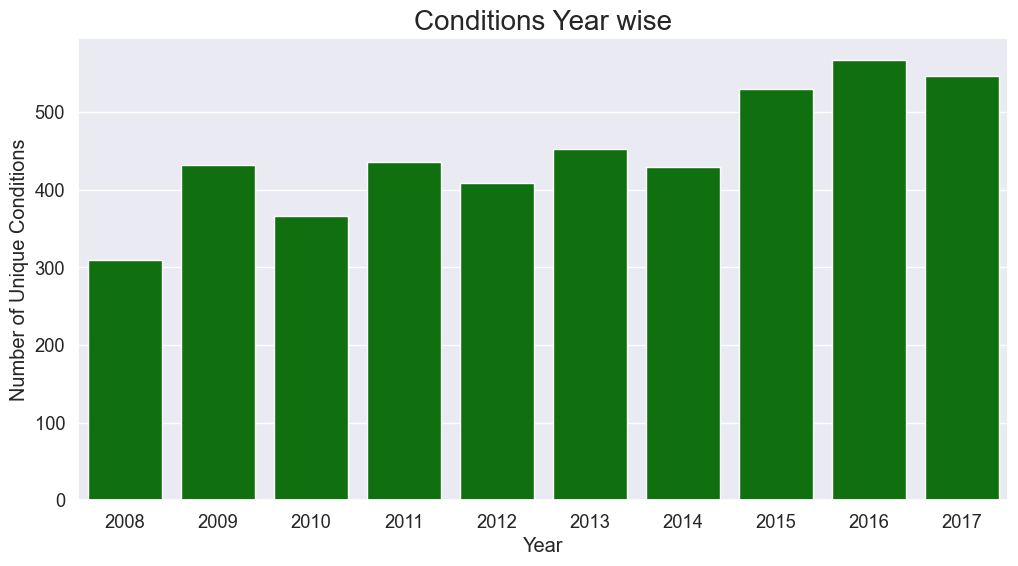

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is a DataFrame containing the necessary data
# Replace this with the actual DataFrame containing your data

# Check year-wise condition counts
year_wise_condition = merged_data.groupby('year')['condition'].nunique()
sns.barplot(x=year_wise_condition.index, y=year_wise_condition.values, color='green')
plt.title('Conditions Year wise', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Unique Conditions')
plt.show()


* Condition has increased in last 3 years. Which means the new conditions has been coming up.
* Starting year 2008 had lowest number of conditions. 

**We expect that as the the conditions has increased. Drugs should have also increased. Let's check that out.**

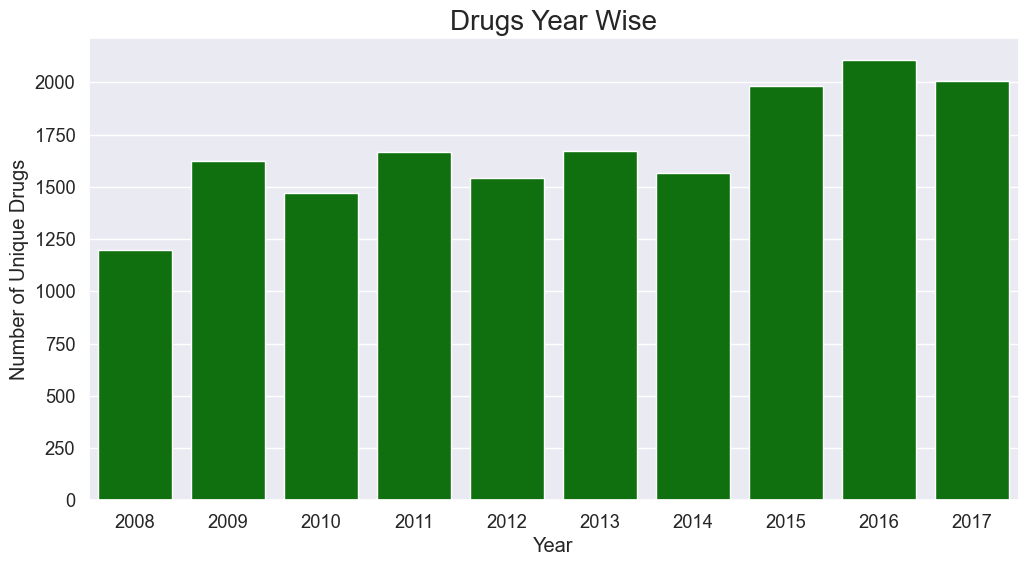

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is a DataFrame containing the necessary data
# Replace this with the actual DataFrame containing your data

# Check year-wise drug counts
year_wise_drug = merged_data.groupby('year')['drugName'].nunique()
sns.barplot(x=year_wise_drug.index, y=year_wise_drug.values, color='green')
plt.title('Drugs Year Wise', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Unique Drugs')
plt.show()


As expected number of drugs has also increased in last three years.

## Data Pre-Processing

Data Pre-processing is a vital part in model building. **"Garbage In Garbage Out"**, we all have heard this statement. But what does it mean. It means if we feed in garbage in our data like missing values, and different features which doesn't have any predictive power and provides the same information in our model. Our model will be just making a random guess and it won't be efficient enough for us to use it for any predictions.

In [244]:
# check the null values
merged_data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
year              0
month             0
dtype: int64

We only have null values in condition. We will drop the records with null values as it only accounts for 0.5 % of total data.

In [245]:
# drop the null values
merged_data.dropna(inplace=True, axis=0)

### Pre-Processing Reviews

**Check the first few reviews**

In [246]:
#check first three reviews
for i in merged_data['review'][0:3]:
    print(i,'\n')

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil" 

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective." 

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestod

In [247]:
def label_sentiment(rating):
    if rating in range(1, 4):
        return "Negative"
    elif rating in range(4, 7):
        return "Neutral"
    elif rating in range(7, 11):
        return "Positive"
    else:
        return None

merged_data['Sentiment'] = merged_data['rating'].apply(label_sentiment)


In [248]:
# target column 
merged_data[['rating', 'Sentiment']].sample(5)

,rating,Sentiment
178602,10,Positive
111242,8,Positive
87989,1,Negative
163580,10,Positive
141693,9,Positive


In [249]:
neutral_reviews = merged_data[merged_data['Sentiment'] == 'Neutral']

# Count the occurrences of each value in the DataFrame
value_counts = neutral_reviews['Sentiment'].value_counts()

print(value_counts)


Sentiment
Neutral    25497
Name: count, dtype: int64


In [250]:
positive_reviews = merged_data[merged_data['Sentiment'] == 'Positive']

# Count the occurrences of each value in the DataFrame
value_counts = positive_reviews['Sentiment'].value_counts()

print(value_counts)


Sentiment
Positive    140832
Name: count, dtype: int64


In [251]:
neg_reviews = merged_data[merged_data['Sentiment'] == 'Negative']

# Count the occurrences of each value in the DataFrame
value_counts = neg_reviews['Sentiment'].value_counts()

print(value_counts)


Sentiment
Negative    46369
Name: count, dtype: int64


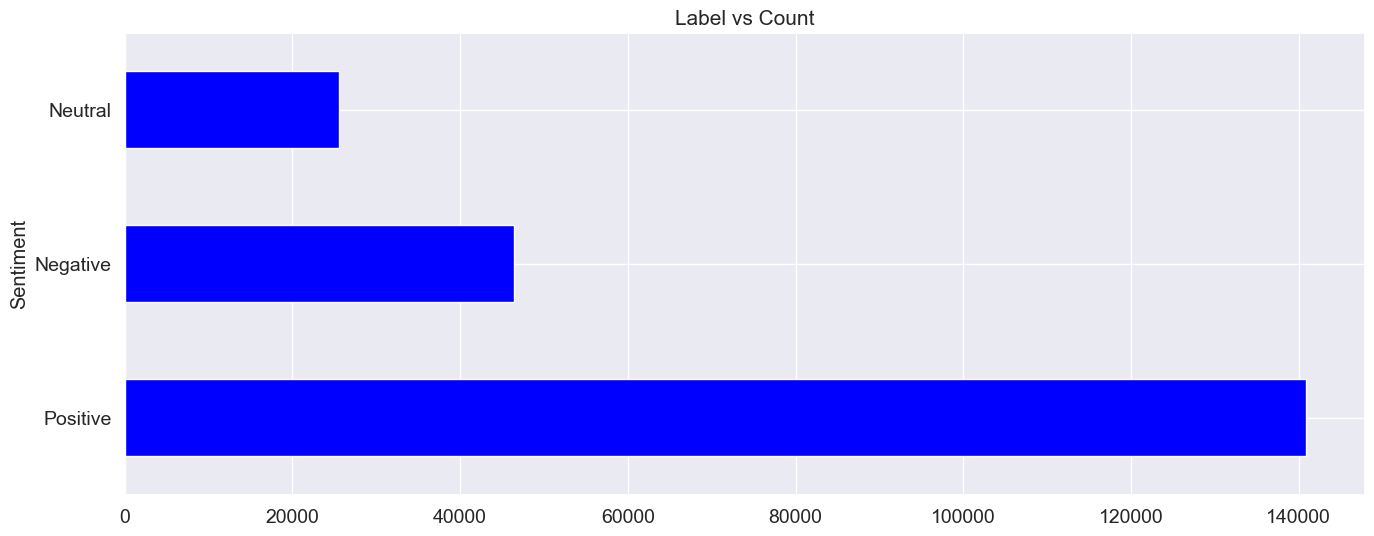

In [252]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = merged_data.Sentiment.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [253]:
import pandas as pd
# Extract separate DataFrames for each sentiment category
neutral_data = merged_data[merged_data['Sentiment'] == 'Neutral']
positive_data = merged_data[merged_data['Sentiment'] == 'Positive']
negative_data = merged_data[merged_data['Sentiment'] == 'Negative']

# Find the minimum count among all sentiment categories
min_count = min(len(neutral_data), len(positive_data), len(negative_data))

# Downsample the positive sentiment data
positive_sampled = positive_data.sample(n=min_count, random_state=42)

# Upsample the neutral and negative sentiment data
neutral_sampled = neutral_data.sample(n=min_count, replace=True, random_state=42)
negative_sampled = negative_data.sample(n=min_count, replace=True, random_state=42)

# Concatenate the balanced data
balanced_data = pd.concat([positive_sampled, neutral_sampled, negative_sampled])

# Shuffle the balanced data
merged_data= balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


# Now you have a balanced data containing equal counts of each sentiment category


In [254]:
merged_data['Sentiment'].value_counts()

Sentiment
Neutral     25497
Negative    25497
Positive    25497
Name: count, dtype: int64

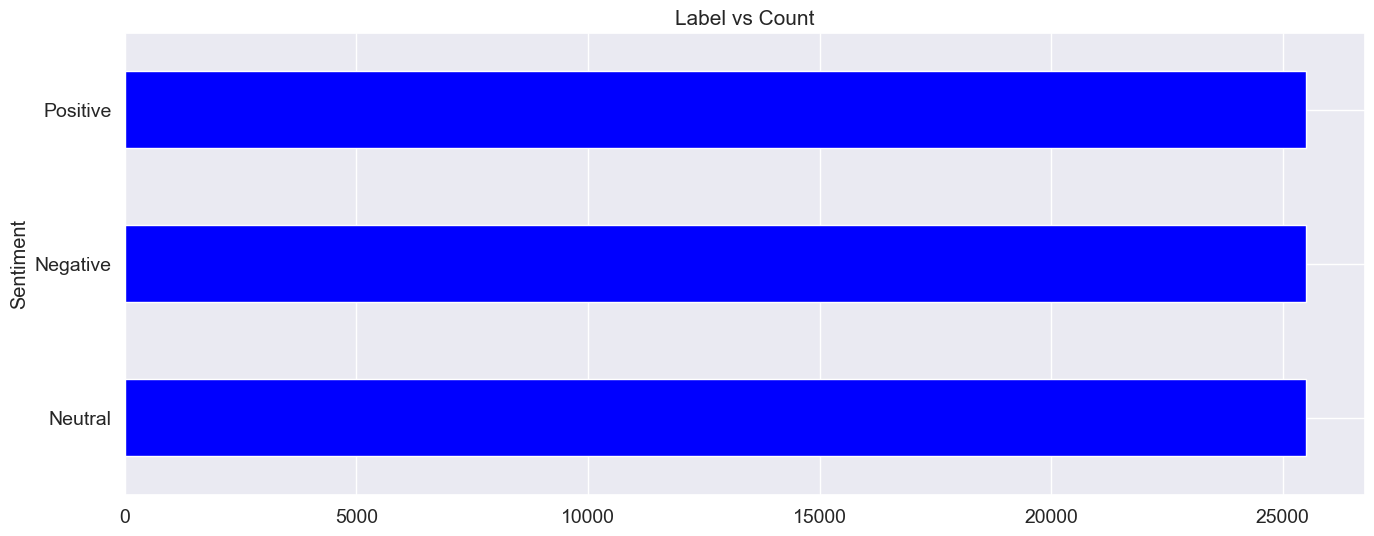

In [255]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = merged_data.Sentiment.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

import pickle

In [257]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords 
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

# 
final_stopwords.add("one")
print(final_stopwords)

{'is', 'on', 'under', 'needn', 'myself', 'up', 'during', 'yourself', 'ourselves', 'he', 'were', 'yours', "you've", 'your', 'has', 'haven', 'them', 'me', 'down', 'she', 'these', 'out', 'was', 'we', 'over', 'if', 'they', 'whom', 'hadn', 'hasn', 'to', 'then', 'doesn', 'it', 'such', 'herself', 'didn', 'don', 'or', 'shouldn', 'hers', 'below', 'after', 'ma', 'theirs', 'being', "you'll", 'some', 'too', 'because', 'this', 'any', 'themselves', 'our', 'other', 'few', 'be', 'above', 'why', 'you', 'only', "you're", 'do', 'wouldn', 're', "it's", 'll', 'his', 'a', 'shan', 'her', 'its', 'himself', 'when', 'will', 'with', 'once', 'each', 've', 'and', 'by', 'o', 'doing', 'ain', 'an', 'the', 'before', 'what', 'between', 'itself', 'him', 'their', 'that', 'have', 'but', 'mustn', 'just', 'as', 'can', 'again', 'm', 'did', 'are', 'those', 'in', 'through', 'about', 'both', 'here', 'had', 't', "you'd", 'weren', 'more', 'i', 'for', "she's", 'wasn', 'd', 'which', 'y', "should've", 'same', 'one', 'very', 'my', 'f

In [258]:
#stemming object
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")
# ---------------------------------------------

In [259]:
def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)
    
    # remove digits
    review = review.translate(remove_digits)
    
    # lower case all letters
    review = review.lower()
    
    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    
    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]
    
    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])
    
    return review

In [260]:
print("Before preprocessing : ")
merged_data.review.iloc[6]

Before preprocessing : 


'"First time on Humira was like a miracle, my arthritis was minimal &amp; my psoriasis too but I felt &quot;finally a cure&quot; and it cleared everything up.  After taking Humira for 2 yrs I missed 1 month of shots (had it in the freezer by mistake).  I thought it&#039;ll be okay however, my psoriasis came back worse than ever.  I went back on Humira hoping everything will clear again and it hasn&#039;t so now I&#039;m in a limbo again should I stay or should I stop.  Has anyone experience this and if so what have you done?  PLEASE HELP."'

In [261]:
# apply preprocessing function

merged_data.review = merged_data.review.apply(preprocessor) 
print("After preprocessing : ")
merged_data.review.iloc[6]

After preprocessing : 


'first time humira like miracl arthriti minim amp psoriasi felt quotfin curequot clear everyth take humira yr miss month shot freezer mistak thought itll okay howev psoriasi came back wors ever went back humira hope everyth clear hasnt now im limbo stay stop anyon experi done pleas help'

In [262]:
def generate_wcloud(review):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(review)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

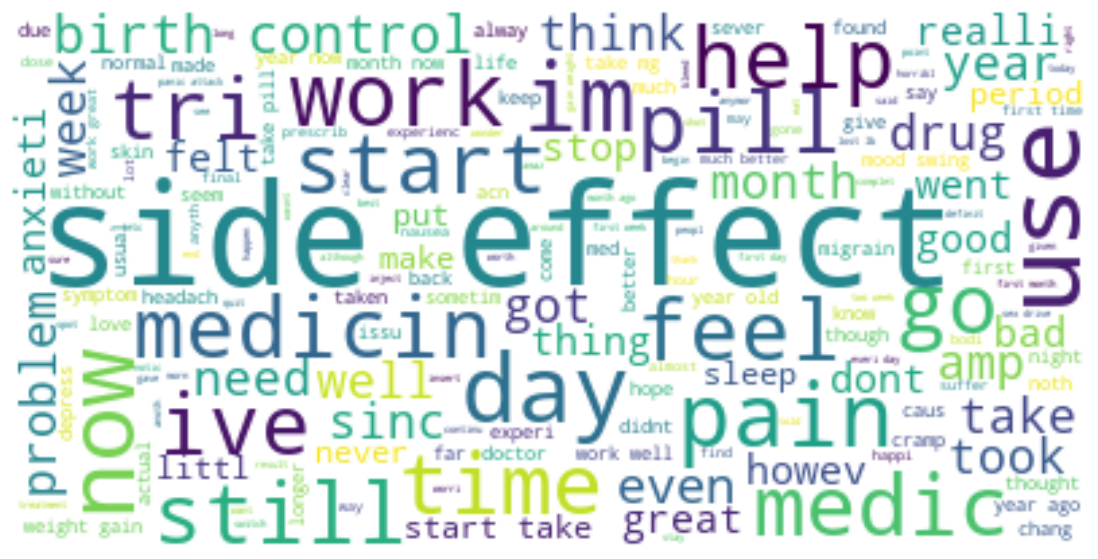

In [263]:
pos = merged_data.loc[merged_data.Sentiment=="Positive"].review
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

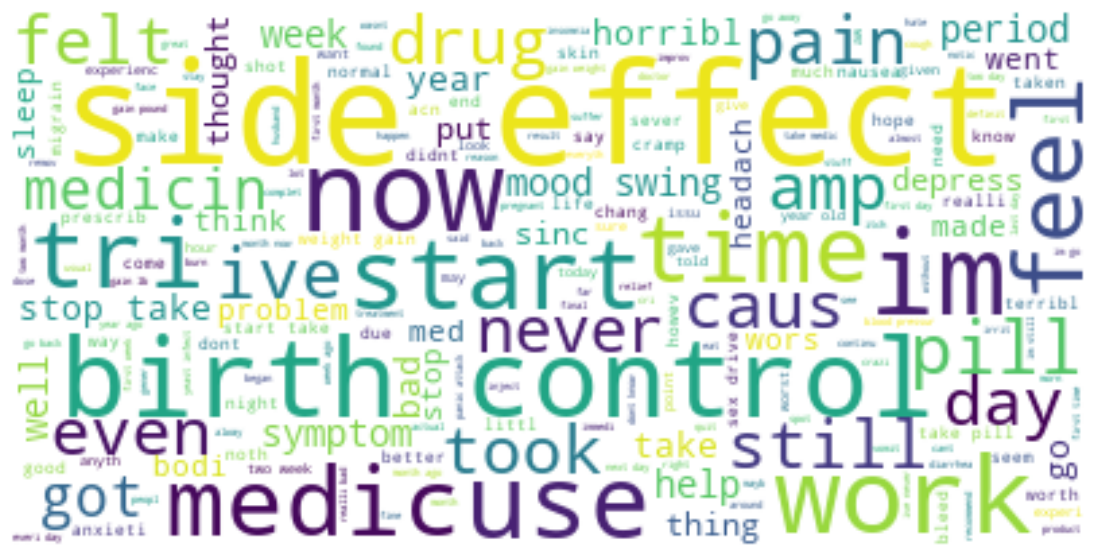

In [264]:
pos = merged_data.loc[merged_data.Sentiment=="Negative"].review
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

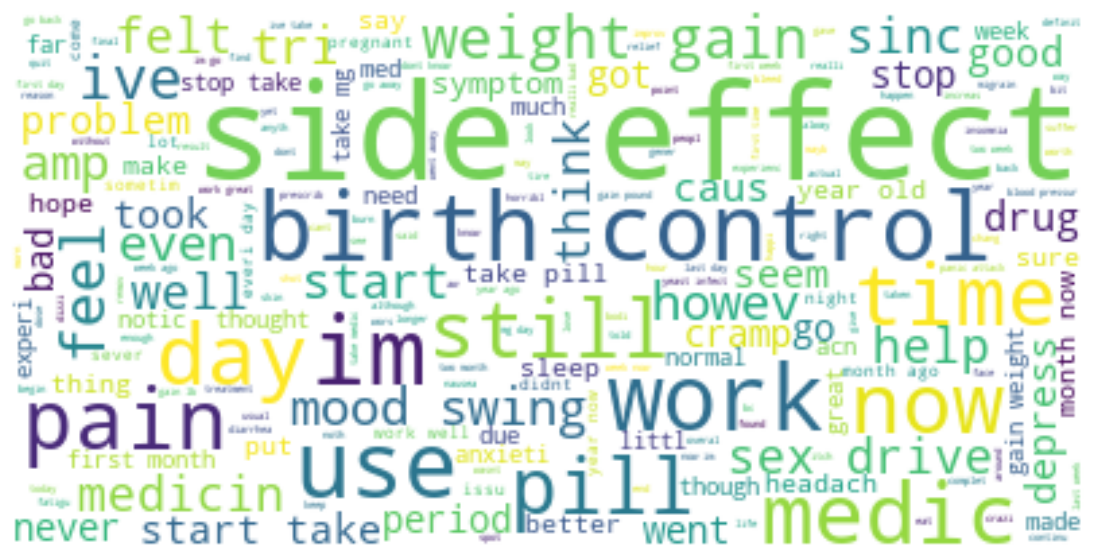

In [265]:
pos = merged_data.loc[merged_data.Sentiment=="Neutral"].review
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

### Steps for reviews pre-processing.
* **Remove HTML tags**
     * Using BeautifulSoup from bs4 module to remove the html tags. We have already removed the html tags with pattern "64</_span_>...", we will use get_text() to remove the html tags if there are any.
* **Remove Stop Words**
     * Remove the stopwords like "a", "the", "I" etc.
* **Remove symbols and special characters**
     * We will remove the special characters from our reviews like '#' ,'&' ,'@' etc.
* **Tokenize**
     * We will tokenize the words. We will split the sentences with spaces e.g "I might come" --> "I", "might", "come"
* **Stemming**
     * Remove the suffixes from the words to get the root form of the word e.g 'Wording' --> "Word"

## Building Model

In [266]:
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

 we cannot pass raw text features in our model. We have to convert them into numeric values. We will use TfidfVectorizer to convert our reviews in numeric features.

### TfidfVectorizer (Term frequency - Inverse document frequency)
**TF - Term Frequency** :- 

How often a term t occurs in a document d.

TF = (_Number of occurences of a word in document_) / (_Number of words in that document_)

**Inverse  Document Frequency**

IDF = log(Number of sentences / Number of sentence containing word)

**Tf - Idf = Tf * Idf**


In [267]:
X = merged_data.review
y = merged_data.Sentiment

X_train, X_test, y_train, y_test = train_test_split(
    
    X, y, test_size=0.20, random_state=1, stratify=y)

In [268]:
X_train.shape, X_test.shape

((61192,), (15299,))

In [269]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

In [270]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

In [271]:
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

['Negative', 'Neutral', 'Positive']


In [272]:
### 
from sklearn.metrics import accuracy_score, confusion_matrix
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

In [273]:
# Hyperparameters
from sklearn.linear_model import LogisticRegression
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.6181526996993071
Test accuracy score : 0.6114778743708739

 ----------------------------------------



LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.6745979866649235
Test accuracy score : 0.6456631152362899

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.73408288665185
Test accuracy score : 0.6712857049480359

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.7884037129036475
Test accuracy score : 0.6891300084972874

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.816577330369983
Test accuracy score : 0.6882149160075822

 ----------------------------------------


In [274]:
from sklearn.naive_bayes import MultinomialNB
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.673568440318996
Test accuracy score : 0.610693509379698

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.6635344489475749
Test accuracy score : 0.6113471468723446

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.6582232971630279
Test accuracy score : 0.6098437806392575

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.6562785985096091
Test accuracy score : 0.6097130531407281

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.6546280559550268
Test accuracy score : 0.6093862343944049

 ----------------------------------------


In [275]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.5732448686102759
Test accuracy score : 0.5716059873194327

 ----------------------------------------



LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.6062557197019218
Test accuracy score : 0.6010850382377934

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.6658386717217937
Test accuracy score : 0.6442251127524675

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.7306347234932671
Test accuracy score : 0.6724622524347996

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.7880768727938292
Test accuracy score : 0.6883456435061115

 ----------------------------------------


In [276]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.6927866387763106
Test accuracy score : 0.616249428067194

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.6824094652895804
Test accuracy score : 0.6205634355186613

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.6737808863903778
Test accuracy score : 0.6195829792796915

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.6698751470780494
Test accuracy score : 0.6171645205568992

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.6676362923257942
Test accuracy score : 0.6164455193149879

 ----------------------------------------


In [277]:

def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)
    
    return plt.show()

In [278]:
bmodel = LogisticRegression(C=c, max_iter=500, random_state=1)
bmodel.fit(bow_X_train, y_train)

LogisticRegression(C=10, max_iter=500, random_state=1)

In [279]:
# predictions
y_preds_train = bmodel.predict(bow_X_train)
y_preds_test = bmodel.predict(bow_X_test)

In [280]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.816577330369983
Test accuracy score : 0.6882149160075822


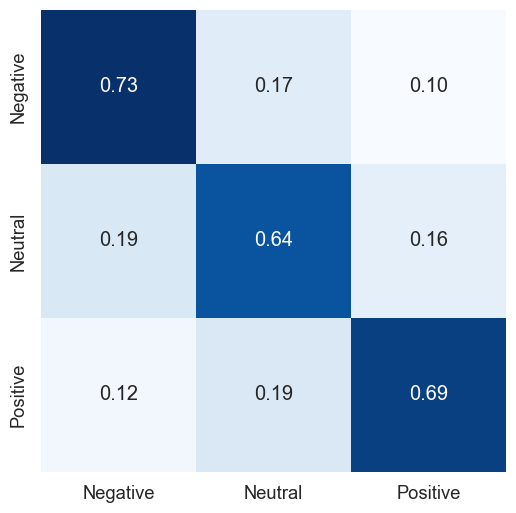

In [281]:
plot_cm(y_test, y_preds_test)

In [282]:
import pickle
with open("transformer.pkl", "wb") as f:
    pickle.dump(bow_vectorizer, f)
    
with open("model.pkl", "wb") as f:
    pickle.dump(bmodel, f)

In [283]:
# labels = ['Negative', 'Neutral', 'Positive']
def get_sentiment(review):
    # preprocessing
    x = preprocessor(review)
    #vectorization
    x = bow_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [284]:
# positve review
review = "Wow, this medication has been a game-changer for me! Since starting it, I've noticed a significant improvement in my condition. I feel more energetic and my symptoms have greatly reduced. So grateful for this drug!"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [285]:
review = "I had high hopes for this medication, but unfortunately, it didn't work for me at all. Not only did I experience unpleasant side effects, but my symptoms actually worsened. I wouldn't recommend it to anyone based on my experience."
print(f"This is a {get_sentiment(review)} review!")

This is a Negative review!


In [286]:
review ="The medication seems to be helping to manage my symptoms, but it's too soon to tell if it's truly effective. I'll continue to monitor my progress and discuss any concerns with my healthcare provider."
print(f"This is a {get_sentiment(review)} review!")

This is a Neutral review!
